# Uploading the images

In [1]:
#upload the image1.jpg here
from google.colab import files
uploaded=files.upload()

Saving image1.jpg to image1 (1).jpg


In [2]:
#upload image2.jpg here
from google.colab import files
uploaded=files.upload()

Saving image2.jpg to image2 (1).jpg


In [3]:
import torch
import torchvision
from PIL import Image

# Define the model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Load the images
image1 = Image.open('image1.jpg')
image2 = Image.open('image2.jpg')

# Convert the images to tensors
tensor1 = torchvision.transforms.functional.to_tensor(image1)
tensor2 = torchvision.transforms.functional.to_tensor(image2)

# Put the tensors into a list
images = [tensor1, tensor2]

# Make a prediction on the images
with torch.no_grad():
    predictions = model(images)

# Loop through the predictions
for i in range(len(predictions)):
    prediction = predictions[i]

    # Get the bounding boxes and masks
    boxes = prediction['boxes']
    masks = prediction['masks']

    # Loop through the boxes
    for j in range(len(boxes)):
        box = boxes[j]
        mask = masks[j, 0]

        # Extract the object from the image
        x1, y1, x2, y2 = box.int().tolist() # Convert to list and then to int
        object_image = image2.crop((x1, y1, x2, y2))

        # Save the object image
        object_image.save(f'object_{i}_{j}.jpg')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 179MB/s]


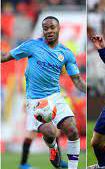

In [ ]:
from PIL import Image

# Open the saved image
saved_image = Image.open('object_0_0.jpg')

# Show the image
saved_image.show()


#For videos

In [4]:
#upload the city.mp4 file here
from google.colab import files
uploaded=files.upload()

Saving city.mp4 to city (1).mp4


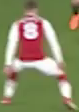

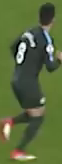

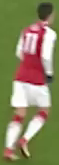

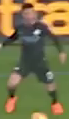

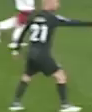

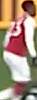

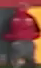

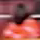

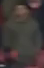

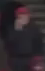

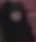

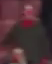

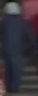

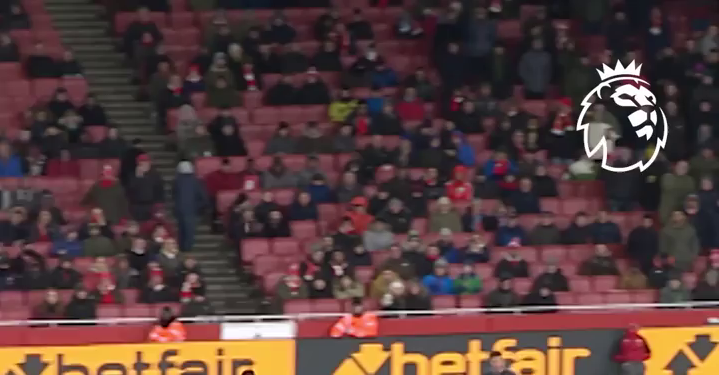

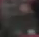

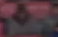

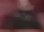

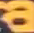

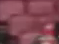

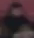

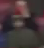

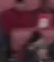

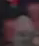

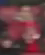

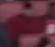

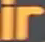

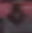

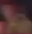

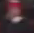

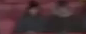

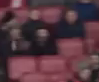

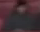

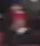

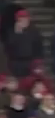

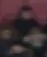

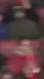

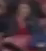

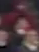

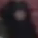

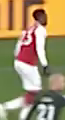

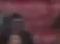

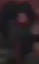

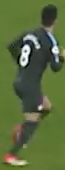

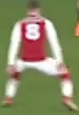

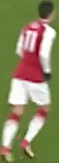

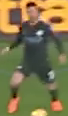

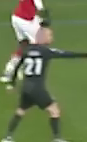

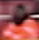

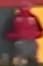

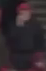

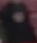

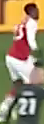

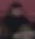

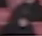

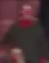

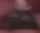

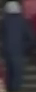

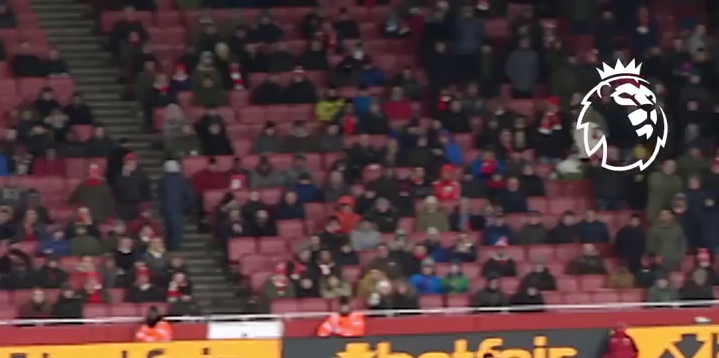

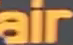

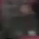

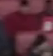

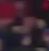

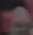

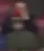

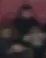

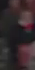

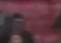

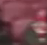

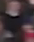

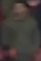

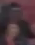

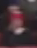

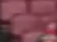

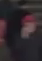

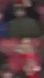

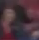

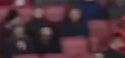

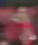

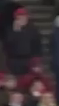

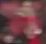

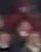

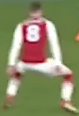

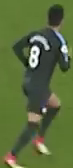

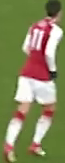

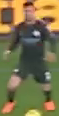

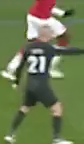

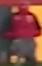

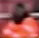

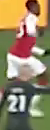

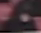

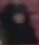

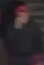

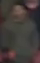

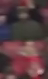

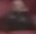

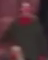

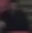

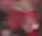

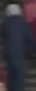

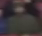

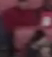

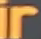

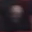

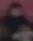

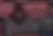

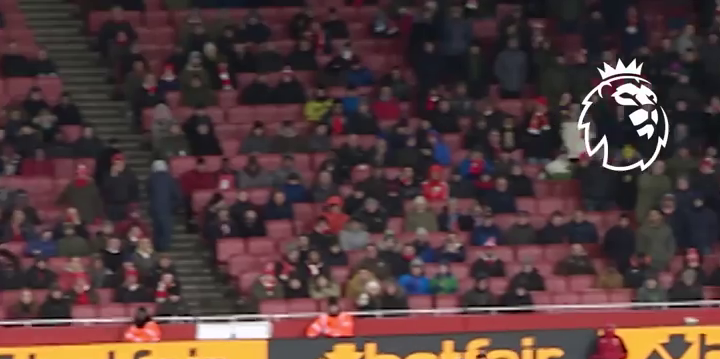

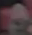

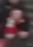

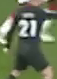

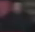

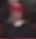

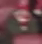

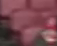

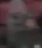

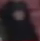

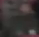

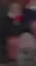

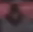

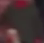

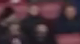

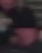

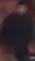

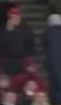

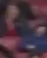

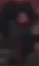

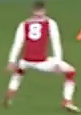

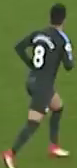

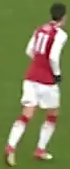

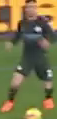

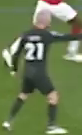

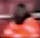

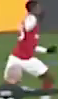

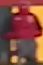

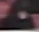

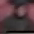

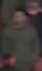

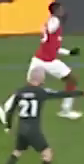

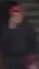

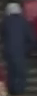

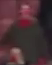

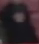

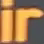

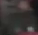

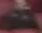

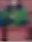

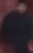

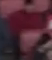

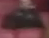

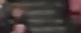

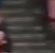

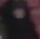

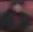

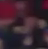

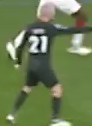

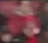

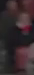

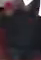

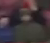

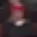

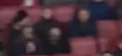

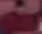

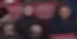

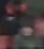

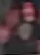

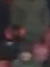

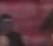

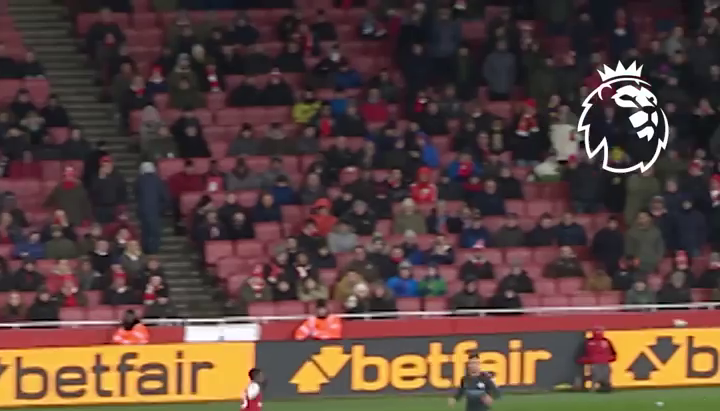

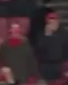

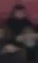

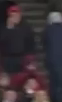

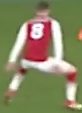

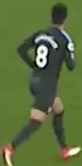

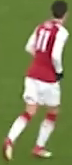

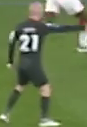

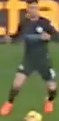

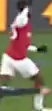

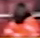

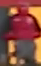

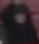

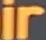

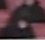

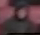

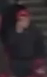

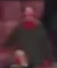

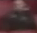

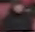

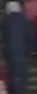

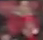

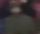

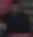

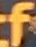

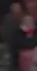

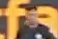

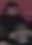

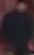

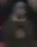

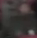

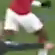

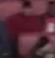

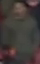

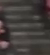

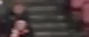

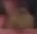

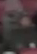

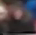

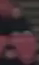

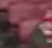

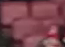

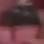

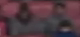

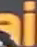

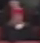

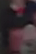

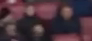

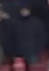

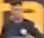

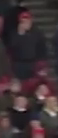

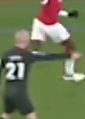

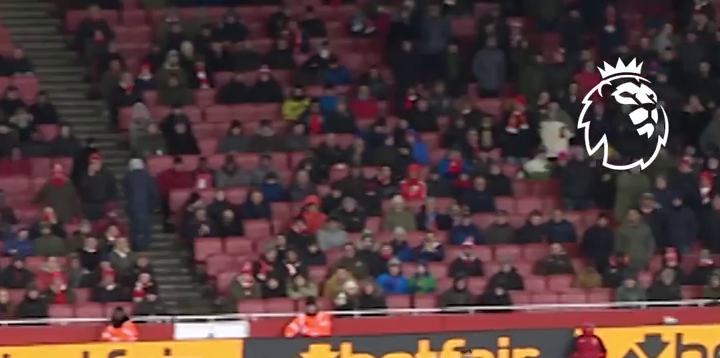

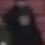

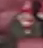

In [6]:
import time
import torch
import torchvision
import cv2
from google.colab.patches import cv2_imshow

# Define the model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Open the video file
video = cv2.VideoCapture('city.mp4')

# Get the start time
start_time = time.time()

# Initialize variables for tracking precision and recall
total_boxes = 0
total_objects = 0

# Loop through the frames of the video
while True:
    # Read the next frame from the video
    ret, frame = video.read()

    # Stop the loop if we have reached the end of the video
    if not ret:
        break

    # Check if we have exceeded 60 seconds
    elapsed_time = time.time() - start_time
    if elapsed_time > 60:
        break

    # Convert the frame to a tensor
    tensor = torchvision.transforms.functional.to_tensor(frame)

    # Make a prediction on the frame
    with torch.no_grad():
        prediction = model([tensor])

    # Get the bounding boxes and masks
    boxes = prediction[0]['boxes']
    masks = prediction[0]['masks']

    # Loop through the boxes
    for j in range(len(boxes)):
        box = boxes[j]
        mask = masks[j, 0]

        # Extract the object from the frame
        x1, y1, x2, y2 = box.int().tolist() # Convert to list and then to int
        object_image = frame[y1:y2, x1:x2]

        # Display the object image
        cv2_imshow(object_image)
        cv2.waitKey(1)

        # Increment the total number of boxes and objects
        total_boxes += 1
        total_objects += 1

    # Check if we have exceeded 60 seconds after processing this frame
    elapsed_time = time.time() - start_time
    if elapsed_time > 60:
        break


# Release the video file and close all windows
video.release()
cv2.destroyAllWindows()
